In [505]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [506]:
df_train = pd.read_csv(r"C:\Users\natal\Downloads\hackaton_students_train.csv")
df_test = pd.read_csv(r"C:\Users\natal\Downloads\hackaton_students_test.csv")

Utworzenie zmiennej *design_category*

In [508]:
df_train['design_category'] = df_train[['graphic_design', 'top_1_section',
       'top_2_section', 'top_3_section']].astype(str).agg('_'.join, axis=1).astype('category').cat.codes

In [509]:
df_dict =  df_train[["design_category","graphic_design","top_1_section","top_2_section", "top_3_section"]].drop_duplicates()
df_dict

,design_category,graphic_design,top_1_section,top_2_section,top_3_section
0,9,C,6,3,0
1,6,B,4,3,5
2,8,C,3,6,0
3,2,A,3,1,2
4,4,B,3,4,5
6,3,A,3,2,1
7,0,A,1,2,3
8,5,B,3,5,4
11,7,B,4,5,3
12,1,A,1,3,2


Wstępna eksploracja danych

In [510]:
print(df_train.isna().sum()/df_train.shape[0])

id                                  0.000000
booking_adult_count                 0.000000
booking_child_count                 0.000000
booking_destination_airport_code    0.061201
booking_id                          0.000000
booking_infant_count                0.000000
booking_leg_count                   0.000000
booking_market                      0.000000
booking_origin_airport_code         0.000000
booking_original_currency           0.086146
booking_pax_count                   0.000000
booking_payment_method              0.000000
booking_reservation_month           0.000000
booking_sales_channel               0.000000
booking_segments_count              0.000000
booking_trip_type                   0.000000
booking_window_w                    0.000000
coupon_cabin_class                  0.000000
coupon_destination_airport_code     0.000000
coupon_fare_basis                   0.000000
coupon_marketing_flight_number      0.000000
coupon_miles                        0.000000
coupon_num

In [448]:
df_train.groupby('design_category')['clicked'].agg(['count', 'sum', 'mean']).rename(columns={
    'count': 'total_shown',
    'sum': 'total_clicked',
    'mean': 'CTR'
})

,total_shown,total_clicked,CTR
design_category,,,
0,8524,2805,0.329071
1,8432,2781,0.329815
2,8511,2879,0.338268
3,8423,2663,0.316158
4,8480,2764,0.325943
5,8512,2788,0.327538
6,8586,2861,0.333217
7,8536,2825,0.330951
8,8527,2748,0.322270


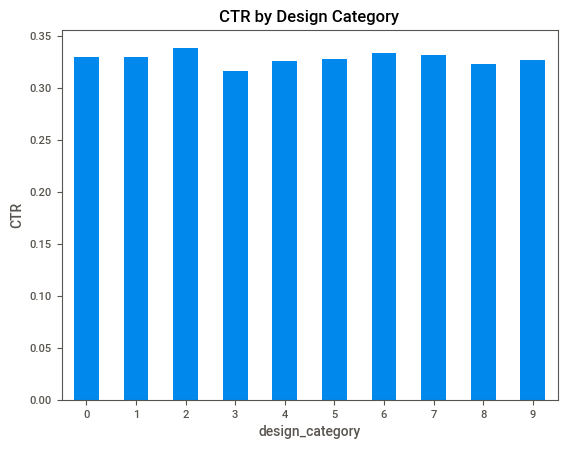

In [449]:
design_ctr = df_train.groupby('design_category')['clicked'].mean()

design_ctr.plot(kind='bar', title='CTR by Design Category', ylabel='CTR')
plt.xticks(rotation=0)
plt.show()

In [332]:
df_train.groupby('design_category')[[
    'booking_adult_count', 'booking_child_count', 'booking_infant_count',
]].mean()

,booking_adult_count,booking_child_count,booking_infant_count
design_category,,,
0,1.454951,0.056664,0.012905
1,1.469758,0.057875,0.012690
2,1.440371,0.057925,0.012219
3,1.434406,0.055681,0.013653
4,1.458844,0.059670,0.013797
5,1.469572,0.061090,0.011631
6,1.458770,0.060913,0.012229
7,1.489222,0.060098,0.012887
8,1.495133,0.056409,0.010789


In [333]:
df_train.groupby(['design_category', 'booking_trip_type'])['clicked'].mean().unstack()

booking_trip_type,MC,OW,RT
design_category,,,
0,0.321970,0.317379,0.334018
1,0.352941,0.314450,0.333276
2,0.369048,0.332726,0.337691
3,0.318095,0.311516,0.317593
4,0.364151,0.310264,0.328184
5,0.356215,0.310509,0.331005
6,0.385932,0.316468,0.334451
7,0.323413,0.324138,0.333889
8,0.350806,0.327977,0.317836


In [334]:
top_markets = df_train['booking_market'].value_counts().head(5).index
df_train[df_train['booking_market'].isin(top_markets)].groupby(
    ['design_category', 'booking_market']
)['clicked'].mean().unstack()


booking_market,DE,GB,PL,SE,US
design_category,,,,,
0,0.405941,0.333333,0.325016,0.333333,0.389728
1,0.337461,0.334311,0.306641,0.339540,0.396777
2,0.338926,0.348348,0.323375,0.321656,0.410896
3,0.337349,0.310897,0.296236,0.322928,0.369877
4,0.310219,0.323699,0.312782,0.315676,0.394450
5,0.368932,0.351351,0.313112,0.322162,0.379592
6,0.374603,0.344444,0.319627,0.330128,0.395233
7,0.320261,0.348525,0.314780,0.319005,0.391039
8,0.359060,0.319149,0.294395,0.341826,0.377264


In [450]:
df_train.groupby(['design_category', 'booking_reservation_month'])['clicked'].mean().unstack()

booking_reservation_month,1,2,3,4,5,6,7,8,9,10,11,12
design_category,,,,,,,,,,,,
0,0.287918,0.241304,0.285714,0.352564,0.402010,0.386431,0.396552,0.339033,0.332588,0.317682,0.326331,0.303150
1,0.267275,0.257471,0.325758,0.418750,0.398190,0.405248,0.358491,0.365820,0.323131,0.334862,0.323099,0.247934
2,0.289062,0.240741,0.389706,0.365672,0.367876,0.432927,0.391478,0.332864,0.355971,0.354294,0.307588,0.288660
3,0.246518,0.216036,0.401460,0.425676,0.444444,0.376582,0.352697,0.347764,0.314396,0.311094,0.281525,0.286290
4,0.274639,0.245119,0.427481,0.352941,0.403587,0.377709,0.390476,0.345965,0.329310,0.319759,0.293716,0.275154
5,0.283333,0.292411,0.328767,0.381295,0.401015,0.398089,0.380244,0.319595,0.324111,0.332326,0.313187,0.308489
6,0.269424,0.315315,0.317073,0.400000,0.377049,0.422492,0.361702,0.337159,0.337486,0.348281,0.312076,0.274841
7,0.276265,0.258947,0.324841,0.423841,0.360577,0.420245,0.406504,0.359886,0.323766,0.331183,0.300847,0.254902
8,0.273585,0.249462,0.360656,0.393333,0.343478,0.365079,0.354967,0.349965,0.335393,0.314202,0.297568,0.271949


Transformacja danych

In [476]:
df_train['if_economy'] = (df_train['coupon_cabin_class'] == 'economy').astype(int)
df_train['if_long_flight'] = (df_train['coupon_range'] == 'LH').astype(int)

Binowanie

In [477]:
bins = [-1, 5, 8, 11, 16, 20, 23] 
labels = ['late_night', 'early_morning', 'morning', 'afternoon', 'evening', 'night']

df_train['departure_hour_interval'] = pd.cut(df_train['leg_departure_hour'], bins=bins, labels=labels)
df_train['arrival_hour_interval'] = pd.cut(df_train['leg_arrival_hour'], bins=bins, labels=labels)

Wybór zmiennych - metoda ekspercka

In [478]:
df_train_expert = df_train[["booking_adult_count",
"booking_child_count",
"booking_infant_count",
"if_long_flight",
"if_economy",
"departure_hour_interval",
"arrival_hour_interval",
"booking_window_w",
"design_category",
"booking_trip_type",
"clicked"]]
df_train_expert

,booking_adult_count,booking_child_count,booking_infant_count,if_long_flight,if_economy,departure_hour_interval,arrival_hour_interval,booking_window_w,design_category,booking_trip_type,clicked
0,1,0,0,0,1,late_night,early_morning,4,9,RT,0
1,1,0,0,1,1,evening,evening,2,6,RT,1
2,1,0,0,0,1,afternoon,evening,0,8,RT,0
3,1,0,0,1,1,afternoon,late_night,0,2,OW,1
4,1,0,0,0,1,evening,late_night,9,4,RT,1
...,...,...,...,...,...,...,...,...,...,...,...
84944,1,0,0,1,1,afternoon,evening,2,6,RT,1
84945,1,0,0,1,1,afternoon,morning,36,4,RT,1
84946,2,0,0,1,1,early_morning,afternoon,15,8,RT,1
84947,2,0,0,0,1,evening,night,3,3,RT,0


Zmiana typów danych + OneHotEncoder

In [479]:
df_train_expert.booking_trip_type = df_train_expert.booking_trip_type.astype('category')

C:\Users\natal\AppData\Local\Temp\ipykernel_18612\477010221.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [480]:
df_train_expert.design_category.info

<bound method Series.info of 0        9
1        6
2        8
3        2
4        4
        ..
84944    6
84945    4
84946    8
84947    3
84948    6
Name: design_category, Length: 84949, dtype: int8>

In [481]:
ohe = OneHotEncoder(sparse_output=False)

ohe_data = ohe.fit_transform(df_train_expert.select_dtypes("category")) 
ohe_df = pd.DataFrame(data=ohe_data, columns=ohe.get_feature_names_out())
df_train_expert = pd.concat([df_train_expert.select_dtypes(exclude="category"), ohe_df], axis=1)

df_train_expert

,booking_adult_count,booking_child_count,booking_infant_count,if_long_flight,if_economy,booking_window_w,design_category,clicked,departure_hour_interval_afternoon,departure_hour_interval_early_morning,...,departure_hour_interval_night,arrival_hour_interval_afternoon,arrival_hour_interval_early_morning,arrival_hour_interval_evening,arrival_hour_interval_late_night,arrival_hour_interval_morning,arrival_hour_interval_night,booking_trip_type_MC,booking_trip_type_OW,booking_trip_type_RT
0,1,0,0,0,1,4,9,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,0,1,1,2,6,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,1,0,8,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,1,1,0,2,1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,1,9,4,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84944,1,0,0,1,1,2,6,1,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
84945,1,0,0,1,1,36,4,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
84946,2,0,0,1,1,15,8,1,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
84947,2,0,0,0,1,3,3,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [482]:
df_train_expert.design_category = df_train_expert.design_category.astype('category')

Dodanie transformacji do zbioru testowego

In [483]:
df_test['if_economy'] = (df_test['coupon_cabin_class'] == 'economy').astype(int)
df_test['if_long_flight'] = (df_test['coupon_range'] == 'LH').astype(int)
bins = [-1, 5, 8, 11, 16, 20, 23] 
labels = ['late_night', 'early_morning', 'morning', 'afternoon', 'evening', 'night']

df_test['departure_hour_interval'] = pd.cut(df_test['leg_departure_hour'], bins=bins, labels=labels)
df_test['arrival_hour_interval'] = pd.cut(df_test['leg_arrival_hour'], bins=bins, labels=labels)
df_test.booking_trip_type = df_test.booking_trip_type.astype('category')

In [484]:
ohe_data = ohe.fit_transform(df_test.select_dtypes("category")) 
ohe_df = pd.DataFrame(data=ohe_data, columns=ohe.get_feature_names_out())
df_test = pd.concat([df_test.select_dtypes(exclude="category"), ohe_df], axis=1)

Weryfikacja wybranych zmiennych

In [485]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train_expert.drop(columns='clicked'), df_train_expert.clicked, train_size=0.6, random_state=42
)

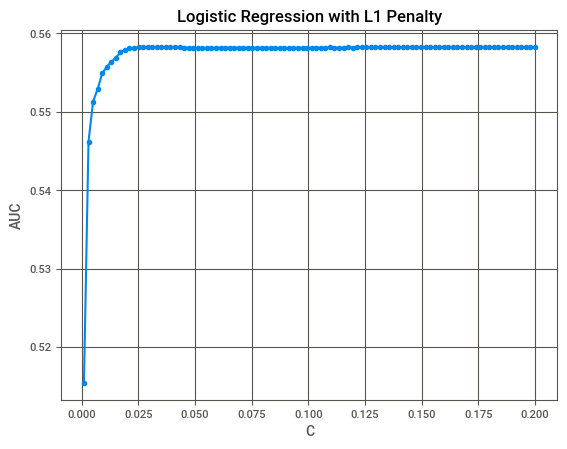

In [486]:
from functools import partial
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


def model_auc(model, X_train, X_test, y_train, y_test):
    trained_model = model.fit(X_train, y_train)
    return roc_auc_score(y_test, trained_model.predict_proba(X_test)[:, 1])

cs = np.linspace(
    0.001, 0.2, 100
) 

LR_L1 = partial(LogisticRegression, penalty="l1", max_iter=1000, solver="liblinear")
aucs_l1 = [model_auc(LR_L1(C=c), X_train, X_test, y_train, y_test) for c in cs]

plt.plot(cs, aucs_l1, marker='o') 
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("Logistic Regression with L1 Penalty")
plt.grid(True)
plt.show()

In [487]:
def lr_l1_coeffs_for_c(c):
    return dict(zip(X_train.columns, LR_L1(C=c).fit(X_train, y_train).coef_[0]))
best_idx = np.argmax(aucs_l1)
best_c = cs[best_idx]
best_auc = aucs_l1[best_idx]
coeffs = lr_l1_coeffs_for_c(best_c)

Odrzucenie nieistotnych zmiennych

In [488]:
zero_coeff_cols = [feature for feature, coef in coeffs.items() if coef == 0]
zero_coeff_cols

['departure_hour_interval_afternoon',
 'departure_hour_interval_late_night',
 'arrival_hour_interval_early_morning',
 'arrival_hour_interval_evening',
 'arrival_hour_interval_late_night',
 'booking_trip_type_MC',
 'booking_trip_type_OW']

Implementacja algorytmu i generacja wyników

In [489]:
df_train_expert.drop(columns=zero_coeff_cols, inplace = True)
df_test.drop(columns=zero_coeff_cols, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(
    df_train_expert.drop(columns='clicked'), df_train_expert.clicked, train_size=0.6, random_state=42
)

In [490]:
uplift_scores = {}
for design in df_train_expert['design_category'].unique():
    print(f"Design {design}...")
    treated = X_train[X_train['design_category'] == design]
    X_treated = treated.drop(columns=["design_category"])
    y_treated = y_train.loc[treated.index]

    control = X_train[X_train['design_category'] != design]
    X_control = control.drop(columns=["design_category"])
    y_control = y_train.loc[control.index]

    X_test_treated = X_test[X_test['design_category'] == design]
    y_test_treated = y_test.loc[X_test_treated.index]

    X_test_control = X_test[X_test['design_category'] != design]
    y_test_control = y_test.loc[X_test_control.index]

    model_treated = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42).fit(X_treated, y_treated)
    model_control = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42).fit(X_control, y_control)

    print(f"Accuracy for model_treated: {accuracy_score(y_test_treated, model_treated.predict(X_test_treated.drop(columns="design_category")))}")
    print(f"Accuracy for model_control: {accuracy_score(y_test_control, model_control.predict(X_test_control.drop(columns="design_category")))}")

    p_treated = model_treated.predict_proba(df_test[df_train_expert.drop(columns=["clicked", "design_category"]).columns])[:, 1]
    p_control = model_control.predict_proba(df_test[df_train_expert.drop(columns=["clicked", "design_category"]).columns])[:, 1]

    uplift_scores[design] = p_treated - p_control

uplift_df = pd.DataFrame(uplift_scores)
df_test['best_design'] = uplift_df.idxmax(axis=1)
df_test['estimated_uplift'] = uplift_df.max(axis=1)

Design 9...
Accuracy for model_treated: 0.6613475177304965
Accuracy for model_control: 0.6741077265001961
Design 6...
Accuracy for model_treated: 0.6670480549199085
Accuracy for model_control: 0.6725495341818659
Design 8...
Accuracy for model_treated: 0.6679158258864226
Accuracy for model_control: 0.6730359542460096
Design 2...
Accuracy for model_treated: 0.6574569221628045
Accuracy for model_control: 0.6752139543999477
Design 4...
Accuracy for model_treated: 0.6714494875549049
Accuracy for model_control: 0.6731228529363651
Design 3...
Accuracy for model_treated: 0.6934523809523809
Accuracy for model_control: 0.6709340300457217
Design 0...
Accuracy for model_treated: 0.6590707309854986
Accuracy for model_control: 0.673115257671318
Design 5...
Accuracy for model_treated: 0.6689450222882615
Accuracy for model_control: 0.6739506777723339
Design 7...
Accuracy for model_treated: 0.672263868065967
Accuracy for model_control: 0.6732582803067385
Design 1...
Accuracy for model_treated: 0.660510

In [491]:
uplift_df

,9,6,8,2,4,3,0,5,7,1
0,-0.022770,0.051335,-0.008590,0.021173,-0.010989,-0.004612,0.006595,0.029636,-0.044413,0.019599
1,-0.015358,0.080463,-0.035903,-0.013272,-0.003970,0.020294,0.012769,-0.028659,-0.000358,-0.034520
2,-0.001919,0.053039,-0.008314,0.002564,-0.004237,0.006802,-0.003995,-0.029543,-0.011681,-0.030845
3,0.086315,0.128228,-0.169767,-0.027372,-0.067196,0.058584,0.256479,-0.092325,-0.079335,-0.118338
4,0.261490,-0.000418,-0.226483,-0.267356,0.171185,-0.207635,-0.118901,-0.203475,-0.066273,0.136781
...,...,...,...,...,...,...,...,...,...,...
9434,-0.185830,-0.244130,0.136114,-0.150139,-0.131927,0.130297,0.129899,0.127811,0.148539,-0.015586
9435,0.006406,-0.048778,-0.046458,0.057967,-0.002878,0.003185,-0.032597,-0.082786,0.150406,-0.049366
9436,-0.196907,-0.096637,0.065686,-0.026028,-0.067220,0.044403,0.055282,0.190223,-0.087285,-0.128188
9437,-0.102664,-0.060299,0.060469,0.051365,0.027388,-0.169631,-0.068605,0.090462,0.085823,0.176174


In [500]:
df_test = df_test.merge(
    df_dict,
    how='left',
    left_on='best_design',
    right_on='design_category'
)

In [501]:
df_test = df_test.drop(columns=['design_category'])

In [ ]:
df_test[['id', 'graphic_design', 'top_1_section', 'top_2_section', 'top_3_section']].to_csv('results.csv',sep=';', index=False)